# 2. Multivariate Analysis of Exoplanet Properties
### Laboratory of Computational Physics @ Physics of Data, UniPD - ??/06/19
#### Braghetto Anna, Frazzetto Paolo, Schimmenti Vincenzo Maria, Signor Theosamuele
---

### Assignment
This is a multistep exercise in exploring a multivariate dataset of random variables. Omit trial plots and tests,
including only those with meaningful results. Some suggested R functions are given [in brackets]. Annotate
the R script clearly, and provide an informal document with paragraph-length interpretation of important
plots and tests. Students are encouraged to work in pairs.

- a) __Download dataset__ Obtain an ASCII multivariate dataset from The Extrasolar Planets Encyclopedia (http://exoplanet.eu/catalog.php (http://exoplanet.eu/catalog.php)). Select variables of interest of both the planet and host star … be generous, as extraneous variables can be omitted later. [names, dim, summary]

- b) __Univariate analysis__ Present the mass distribution of known exoplanets. Consider stratifying by discovery method (radial velocity vs. transits). Try making pretty overlapping histograms with unsaturated colors from the ColorBrewer palette. [boxplot, hist, density]

- c) __Bivariate analysis__ Examine the relationship between two interesting variables, perhaps semi-major vs. eccentricity or (for transiting planets) planet mass vs. planet radius. [plot, boxplot with cut or split, cor,
scatter.smooth/kde2d/ supersmu/loess/ash, lm/residual analysis]

- d) __Prepare multivariate analysis__ Remove outliers and standardize variables. Add a new binary variable indicator for multiple planets. [boxplot, pairs, is.na. scale, cbind]

- e) __Multivariate analysis__ Search for linear and nonlinear structure among the transiting planets. Reduce dimensionality: remove variables of no apparent interest, and create new linear combinations of variables. Choose a response variable for multiple regression. [princomp and plots, lm/plots, earth]

- f) __Machine learning__ Try some modern methods for nonlinear dimensionality reduction and visualization such as Self-Organizing Maps, Isomap, diffusion maps, Local Linear Embedding, Stochastic Neighborhood Embedding. CRAN packages kohonen, dimRed, diffusionMap, etc.
---

## Introduction

An _exoplanet_ is a planet beyond our Solar System. The discovery of exoplantes has skyrocketed in recent years thanks to advanced telescopes and brand-new detecting methods: as of 21 June 2019, there are 4090 confirmed planets in 3049 systems, with more exoplanets confirmed almost every day. Studying the properties of exoplanets and planetary systems not only helps us learn about how these particular systems formed and evolved, but provides essential clues towards understanding whether and where life might exist elsewhere in the Universe.

### Importing the required  R packages

First, we load all the required R packages needed throughout this notebook.

In [1]:
### Install required packages - run only once!

## Select a proper mirror
#mirror = 'http://cran.us.r-project.org'
mirror = 'https://cran.stat.unipd.it/'

install.packages("readr", dependencies=TRUE, INSTALL_opts = c('--no-lock'), repos=mirror)
install.packages('tidyr', repos=mirror)
install.packages('dplyr', repos=mirror)
install.packages("KernSmooth", repos=mirror)
install.packages("kohonen", repos=mirror)
install.packages('igraph', repos=mirror)
install.packages('RANN', repos=mirror)
install.packages('tsne', repos=mirror)
install.packages('Rtsne', repos=mirror)
install.packages('RSpectra', repos=mirror)
install.packages('dimRed', repos=mirror)
install.packages('outliers', repos=mirror)
install.packages('corrplot', repos=mirror)
install.packages('zoo', repos=mirror)
install.packages('diffusionMap', repos=mirror)
install.packages('rgl', repos=mirror)
install.packages('scatterplot3d', repos=mirror)
install.packages("scales", repos=mirror)
install.packages("colorspace", repos=mirror)
install.packages("earth", repos=mirror)

if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("RDRToolbox")

package 'readr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'readr'"


The downloaded binary packages are in
	C:\Users\Paolo\AppData\Local\Temp\RtmpmaB89a\downloaded_packages
package 'tidyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tidyr'"


The downloaded binary packages are in
	C:\Users\Paolo\AppData\Local\Temp\RtmpmaB89a\downloaded_packages
package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"


The downloaded binary packages are in
	C:\Users\Paolo\AppData\Local\Temp\RtmpmaB89a\downloaded_packages
package 'KernSmooth' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'KernSmooth'"


The downloaded binary packages are in
	C:\Users\Paolo\AppData\Local\Temp\RtmpmaB89a\downloaded_packages
package 'kohonen' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Paolo\AppData\Local\Temp\RtmpmaB89a\downloaded_packages
package 'igraph' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Paolo\AppData\Local\Temp\RtmpmaB89a\downloaded_packages
package 'RANN' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Paolo\AppData\Local\Temp\RtmpmaB89a\downloaded_packages
package 'tsne' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Paolo\AppData\Local\Temp\RtmpmaB89a\downloaded_packages
package 'Rtsne' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Paolo\AppData\Local\Temp\RtmpmaB89a\downloaded_packages
package 'RSpectra' successfully unpacked and MD5 sums checked

The downloa

Warning message:
"cannot remove prior installation of package 'dimRed'"


The downloaded binary packages are in
	C:\Users\Paolo\AppData\Local\Temp\RtmpmaB89a\downloaded_packages
package 'outliers' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Paolo\AppData\Local\Temp\RtmpmaB89a\downloaded_packages
package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Paolo\AppData\Local\Temp\RtmpmaB89a\downloaded_packages
package 'zoo' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'zoo'"


The downloaded binary packages are in
	C:\Users\Paolo\AppData\Local\Temp\RtmpmaB89a\downloaded_packages
package 'diffusionMap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Paolo\AppData\Local\Temp\RtmpmaB89a\downloaded_packages
package 'rgl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Paolo\AppData\Local\Temp\RtmpmaB89a\downloaded_packages
package 'scatterplot3d' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Paolo\AppData\Local\Temp\RtmpmaB89a\downloaded_packages
package 'scales' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'scales'"


The downloaded binary packages are in
	C:\Users\Paolo\AppData\Local\Temp\RtmpmaB89a\downloaded_packages
package 'colorspace' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'colorspace'"


The downloaded binary packages are in
	C:\Users\Paolo\AppData\Local\Temp\RtmpmaB89a\downloaded_packages


Bioconductor version 3.9 (BiocManager 1.30.4), R 3.6.0 (2019-04-26)
Installing package(s) 'RDRToolbox'


package 'RDRToolbox' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Paolo\AppData\Local\Temp\RtmpmaB89a\downloaded_packages


Update old packages: 'askpass', 'boot', 'caret', 'cluster', 'dbplyr', 'digest',
  'dimRed', 'dplyr', 'ellipsis', 'evaluate', 'formatR', 'fs', 'ggplot2',
  'glmnet', 'gower', 'hexbin', 'ipred', 'IRkernel', 'knitr', 'lpSolve',
  'markdown', 'MASS', 'mime', 'nlme', 'numDeriv', 'openssl', 'pillar',
  'processx', 'progress', 'quantmod', 'repr', 'reprex', 'rmarkdown',
  'robustbase', 'rvest', 'sfsmisc', 'tibble', 'tinytex', 'xfun', 'zoo'


In [2]:
update.packages(ask=FALSE) # if necesssary

Warning message:
"package 'formatR' is in use and will not be installed"

package 'askpass' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'askpass'"

package 'boot' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'boot'"

package 'caret' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caret'"

package 'cluster' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cluster'"

package 'dbplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dbplyr'"

package 'digest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'digest'"

package 'dimRed' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dimRed'"

package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"

package 'ellipsis' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'ellipsis'"

package 'evaluate' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'evaluate'"

package 'fs' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'fs'"

package 'ggplot2' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'ggplot2'"

package 'glmnet' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glmnet'"

package 'gower' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'gower'"

package 'hexbin' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'hexbin'"

package 'ipred' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'ipred'"

package 'IRkernel' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'IRkernel'"

package 'knitr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'knitr'"

package 'lpSolve' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'lpSolve'"

package 'markdown' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'markdown'"

package 'MASS' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'MASS'"

package 'mime' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'mime'"

package 'nlme' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'nlme'"

package 'numDeriv' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'numDeriv'"

package 'openssl' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'openssl'"

package 'pillar' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'pillar'"

package 'processx' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'processx'"

package 'progress' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'progress'"

package 'quantmod' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'quantmod'"

package 'repr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'repr'"

package 'reprex' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'reprex'"

package 'rmarkdown' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rmarkdown'"

package 'robustbase' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'robustbase'"

package 'rvest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rvest'"

package 'sfsmisc' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'sfsmisc'"

package 'tibble' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tibble'"

package 'tinytex' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tinytex'"

package 'xfun' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'xfun'"

package 'zoo' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'zoo'"


The downloaded binary packages are in
	C:\Users\Paolo\AppData\Local\Temp\RtmpmaB89a\downloaded_packages


In [1]:
### Importing required packages

library(zoo)
library(rgl)
library(tidyr)
library(dplyr)
library(corrplot)
library(KernSmooth)
library(ggplot2)
library(outliers)
library(dimRed)
library(Rtsne)
library(tsne)
library(diffusionMap)
library(RDRToolbox)
library(earth)
library(scatterplot3d)


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

corrplot 0.84 loaded
KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: DRR
Loading required package: kernlab

Attaching package: 'kernlab'

The following object is masked from 'package:ggplot2':

    alpha

Loading required package: CVST
Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand


Attaching package: 'dimRed'

The following object is masked from 'package:stats':

    embed

The following object is masked from 'package:base':

    a

## a) Load the dataset

Then we load the dataset from [The Extrasolar Planets Encyclopedia](http://exoplanet.eu/catalog.php) as a R dataframe.

In [2]:
# import data directly from the web
dat<-read.csv('http://exoplanet.eu/catalog/csv')
dat<-data.frame(dat)
dat # have a look on some entries and features

X..name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
11 Com b,Confirmed,19.40,1.50,1.50,19.40,1.50,1.50,NA,NA,...,G8 III,NA,NA,NA,4742,100,100,,,
11 Oph b,Confirmed,21.00,3.00,3.00,NA,NA,NA,NA,NA,...,M9,0.011,0.002,0.002,2375,175,175,,,"Oph 11A, Oph 1622-2405"
11 UMi b,Confirmed,10.50,2.47,2.47,10.50,2.47,2.47,NA,NA,...,K4III,1.560,0.540,0.540,4340,70,70,,,
14 And b,Confirmed,5.33,0.57,0.57,5.33,0.57,0.57,NA,NA,...,K0III,NA,NA,NA,4813,20,20,,,
14 Her b,Confirmed,4.64,0.19,0.19,4.64,0.19,0.19,NA,NA,...,K0 V,5.100,NA,NA,5311,87,87,,,
16 Cyg B b,Confirmed,1.68,0.07,0.07,1.68,0.07,0.07,NA,NA,...,G2.5 V,8.000,1.800,1.800,5766,60,60,,,
18 Del b,Confirmed,10.30,NA,NA,10.30,NA,NA,NA,NA,...,G6III,NA,NA,NA,4979,18,18,,,
1RXS 1609 b,Confirmed,14.00,3.00,2.00,NA,NA,NA,1.70,NA,...,K7V,0.011,0.002,0.002,4060,200,200,,,"1RXS J160929, 1RXS J1609, 1RXS1609"
1RXS J235133.3+312720 b,Confirmed,32.00,6.00,6.00,NA,NA,NA,NA,NA,...,M2V,0.100,0.050,0.050,NA,NA,NA,,,2MASS J23513366+3127229
1SWASP J1407 b,Confirmed,20.00,6.00,6.00,20.00,6.00,6.00,NA,NA,...,,0.016,NA,NA,4400,100,100,,,


We inspect the data by observing the dataset dimension and features:

In [15]:
summary(dat) # quick overview of the dataset. Notice that each feature has many NA's

       X..name       planet_status       mass        mass_error_min 
 11 Com b  :   1   Confirmed:4090   Min.   : 0.000   Min.   :0.000  
 11 Oph b  :   1                    1st Qu.: 0.107   1st Qu.:0.017  
 11 UMi b  :   1                    Median : 0.960   Median :0.080  
 14 And b  :   1                    Mean   : 5.117   Mean   :  Inf  
 14 Her b  :   1                    3rd Qu.: 3.710   3rd Qu.:0.400  
 16 Cyg B b:   1                    Max.   :81.900   Max.   :  Inf  
 (Other)   :4084                    NA's   :2173     NA's   :2374   
 mass_error_max     mass_sini       mass_sini_error_min mass_sini_error_max
 Min.   :0.0000   Min.   : 0.0005   Min.   :0.000       Min.   :0.000      
 1st Qu.:0.0123   1st Qu.: 0.1459   1st Qu.:0.013       1st Qu.:0.013      
 Median :0.0740   Median : 1.2050   Median :0.072       Median :0.080      
 Mean   :   Inf   Mean   : 3.6226   Mean   :  Inf       Mean   :  Inf      
 3rd Qu.:0.3400   3rd Qu.: 3.3670   3rd Qu.:0.270       3rd Qu.:0.29

In [14]:
cat('Dataset dimension (entires x features):')
dim(dat)

cat('Columns (features):')
colnames(dat)

Dataset dimension (entires x features):

[1] 4090   98

Columns (features):

[1] "X..name"                    "planet_status"             
 [3] "mass"                       "mass_error_min"            
 [5] "mass_error_max"             "mass_sini"                 
 [7] "mass_sini_error_min"        "mass_sini_error_max"       
 [9] "radius"                     "radius_error_min"          
[11] "radius_error_max"           "orbital_period"            
[13] "orbital_period_error_min"   "orbital_period_error_max"  
[15] "semi_major_axis"            "semi_major_axis_error_min" 
[17] "semi_major_axis_error_max"  "eccentricity"              
[19] "eccentricity_error_min"     "eccentricity_error_max"    
[21] "inclination"                "inclination_error_min"     
[23] "inclination_error_max"      "angular_distance"          
[25] "discovered"                 "updated"                   
[27] "omega"                      "omega_error_min"           
[29] "omega_error_max"            "tperi"                     
[31] "tperi_error_min"            "tperi_error_max"           
[33] "tconj"                      "tconj_error_min"           
[35] "tconj_error_max"            "tzero_tr"                  
[37] "tzero_tr_error_min"         "tzero_tr_error_max"        
[39] "tzero_tr_sec"               "tzero_tr_sec_error_min"    
[41] "tzero_tr_sec_error_max"     "lambda_angle"              
[43] "lambda_angle_error_min"     "lambda_angle_error_max"    
[45] "impact_parameter"           "impact_parameter_error_min"
[47] "impact_parameter_error_max" "tzero_vr"                  
[49] "tzero_vr_error_min"         "tzero_vr_error_max"        
[51] "k"                          "k_error_min"               
[53] "k_error_max"                "temp_calculated"           
[55] "temp_calculated_error_min"  "temp_calculated_error_max" 
[57] "temp_measured"              "hot_point_lon"             
[59] "geometric_albedo"           "geometric_albedo_error_min"
[61] "geometric_albedo_error_max" "log_g"                     
[63] "publication"                "detection_type"            
[65] "mass_detection_type"        "radius_detection_type"     
[67] "alternate_names"            "molecules"                 
[69] "star_name"                  "ra"                        
[71] "dec"                        "mag_v"                     
[73] "mag_i"                      "mag_j"                     
[75] "mag_h"                      "mag_k"                     
[77] "star_distance"              "star_distance_error_min"   
[79] "star_distance_error_max"    "star_metallicity"          
[81] "star_metallicity_error_min" "star_metallicity_error_max"
[83] "star_mass"                  "star_mass_error_min"       
[85] "star_mass_error_max"        "star_radius"               
[87] "star_radius_error_min"      "star_radius_error_max"     
[89] "star_sp_type"               "star_age"                  
[91] "star_age_error_min"         "star_age_error_max"        
[93] "star_teff"                  "star_teff_error_min"       
[95] "star_teff_error_max"        "star_detected_disc"        
[97] "star_magnetic_field"        "star_alternate_names"

There are up to 98 different features recorded for each entry, but most of them are not available (NA) values. However, we consider and choose as the most interesting the following ones:
- Mass $[M_{Jup}]$
- Radius $[R_{Jup}]$
- Orbital period $[days]$
- Semi major axis $[AU]$
- Eccentricity 
- Detection method
- Star mass $[M_{Sun}]$
- Star radius $[R_{Sun}]$
- Star metallicity $[Log [(metals/H)star/(metals/H)Sun] ]$
- Star distance $[pc]$
- Star age $[Gy]$
- Effective stellar temperature  

## b) Univariate analysis

### Mass Distribution

We present the mass distribution of known exoplanets. Various histograms and KDE's are shown for two different discovery methods: _radial velocity_ and _primary transit._

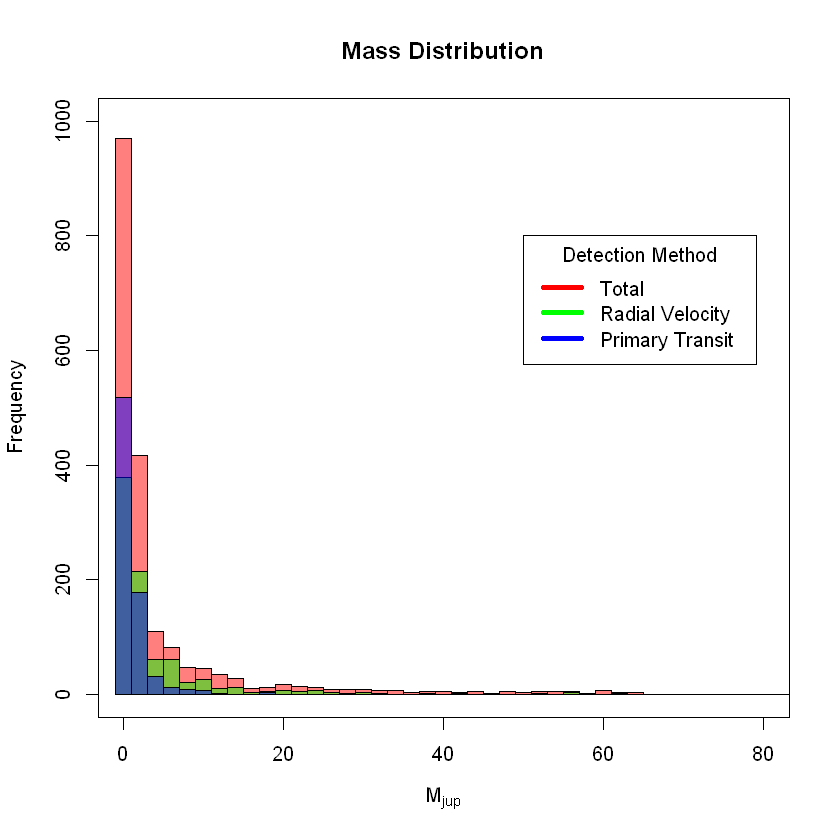

In [5]:
# Plot hist for mass distribution
hist(dat$mass,
     xlab=expression(M[jup]),main='Mass Distribution',breaks=seq(-1,100,2),xlim=c(0,80),col=rgb(1,0,0,1/2), freq=T, ylim=c(0,1000))

Rad.vel <- subset(dat, dat$detection=='Radial Velocity')
hist(Rad.vel$mass,
     xlab=expression(M[jup]),breaks=seq(-1,100,2),add=T,col=rgb(0,1,0,1/2), freq=T)

Prim.transit <- subset(dat, dat$detection=='Primary Transit')
hist(Prim.transit$mass,
     xlab=expression(M[jup]),breaks=seq(-1,100,2),add=T,col=rgb(0,0,1,1/2), freq=T)

legend(50, 800, col=c('red','green', 'blue'),lwd=c(4,4,4), title='Detection Method', 
     	legend=c('Total', 'Radial Velocity','Primary Transit'),)
box()

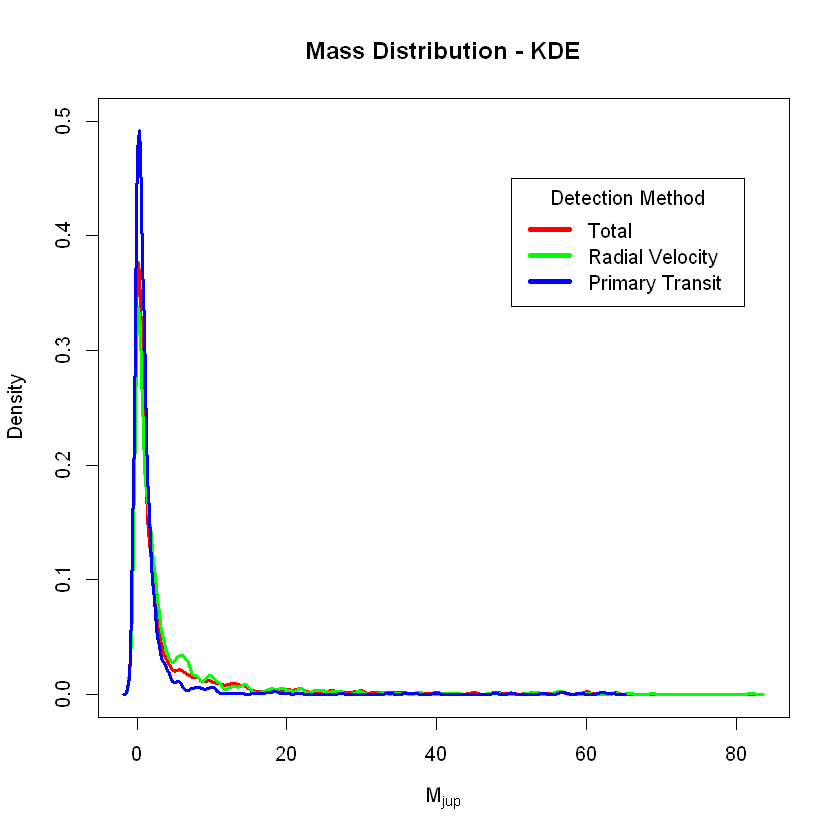

In [13]:
# kernel density estimation KDE

# all methods
#remove NA
TOT <- dat$mass[!is.na(dat$mass)]
# Compute A Binned Kernel Density Estimate, package: KernSmooth. Bandwidth selected with function dpik(X)
kdeTOT <- bkde(TOT, bandwidth = dpik(TOT, scalest = 'stdev', truncate = TRUE)) 
plot(kdeTOT, ylim=c(0,0.5), type='l', col='red', main='Mass Distribution - KDE',xlab=expression(M[jup]), ylab='Density', lwd=3)

# radial velocity method
#remove NA
VEL <- Rad.vel$mass[!is.na(Rad.vel$mass)]
#computing KDE
kdeVEL <- bkde(VEL, bandwidth = dpik(TOT, scalest = 'stdev', truncate = TRUE))
lines(kdeVEL, ylim=c(0,0.5), type='l', col='green', lwd=3)

# primary transit method
#remove NA
PRI <- Prim.transit$mass[!is.na(Prim.transit$mass)]
#computing KDE
kdePRI <- bkde(PRI, bandwidth = dpik(TOT, scalest = 'stdev', truncate = TRUE))
lines(kdePRI, ylim=c(0,0.5), type='l', col='blue', lwd=3)

legend(50, 0.45, col=c('red','green', 'blue'),lwd=c(4,4,4), title='Detection Method', 
     	legend=c('Total', 'Radial Velocity','Primary Transit'),)

### Correlation matrix ---> LA METTIAMO IN BIVARIATE?

In addition, we plot the correlation matrix of the numerical features.
__--->SI VEDE QUALCOSA?__

Warning message in cor(scaled, use = "pairwise.complete.obs"):
"the standard deviation is zero"

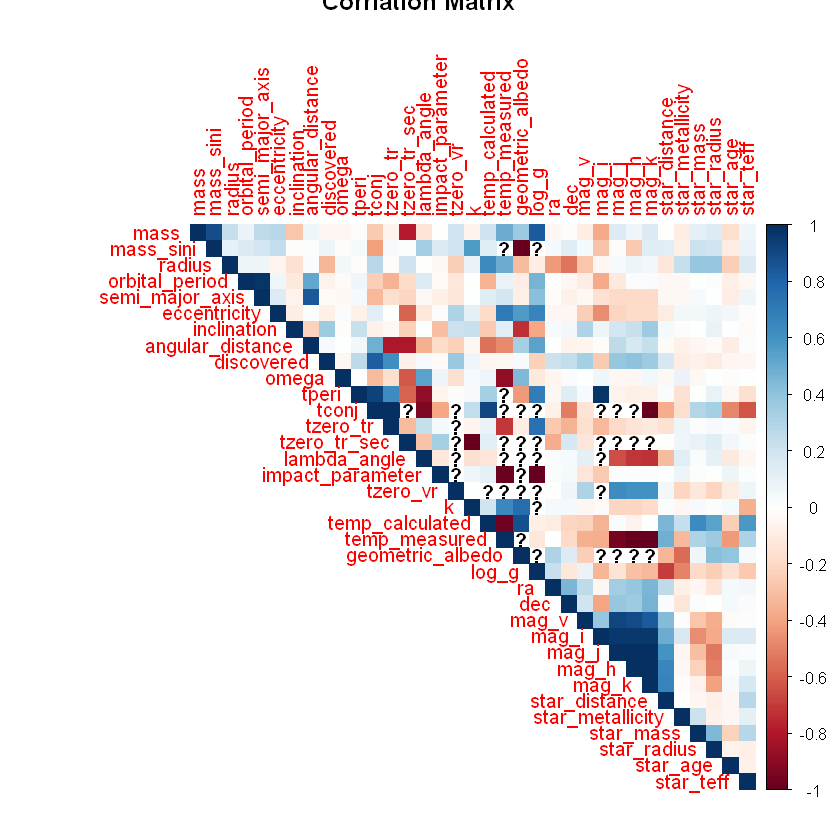

In [50]:
#keep only numerical features (cols)
numeric.columns <- sapply(dat, function(x) {!is.factor(x)})
dat.n<-dat[,numeric.columns]

#remove error cols
df_new <- dat.n %>% select(-contains("error"))

#remove col with NA
df_new <- df_new[,-21]

#standardize
scaled <- as.data.frame(scale(df_new,center=T,scale=T))

#correlation matrix
Corr<-cor(scaled,use='pairwise.complete.obs')

#plot of the correlation matrix
corrplot(Corr, method='color', type='upper', title='Corrlation Matrix') # use package 'corrplot'

## c) Bivariate Analysis

We now examine the relationship between some pairs of variables.

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"307 y values <= 0 omitted from logarithmic plot"

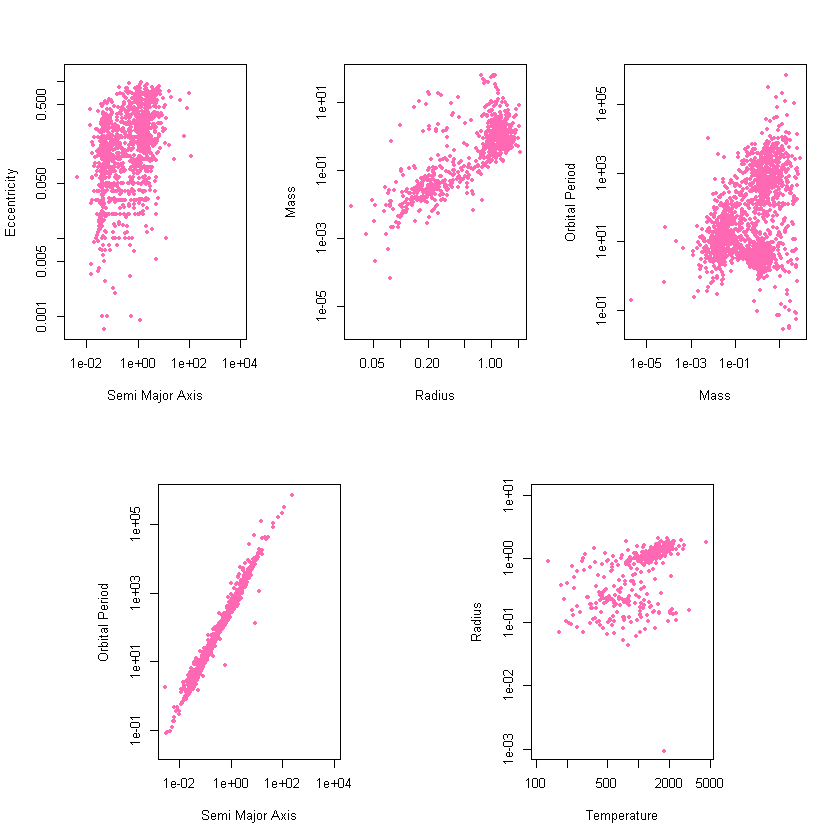

In [39]:
# bivariate analysis, we try with some variable pairs

#par(mfrow=c(2,3))
layout(matrix(c(1,1,1,2,2,2,3,3,3,0,4,4,4,0,5,5,5,0), 2, 9, byrow = TRUE))
plot(dat$semi_major_axis,dat$eccentricity,pch=20,log='xy',col='hotpink', xlab='Semi Major Axis', ylab='Eccentricity')
plot(Prim.transit$radius,Prim.transit$mass,pch=20,log='xy',col='hotpink', xlab='Radius', ylab='Mass')
plot(dat$mass,dat$orbital_period,pch=20,log="xy",col='hotpink', xlab='Mass', ylab='Orbital Period')
plot(dat$semi_major_axis, dat$orbital_period,pch=20,log="xy",col='hotpink', xlab='Semi Major Axis', ylab='Orbital Period')
plot(dat$temp_calculated,dat$radius,pch=20,ylim=c(10^-3,10),log='xy',col='hotpink', xlab='Temperature', ylab='Radius' )

### Semi major axis vs. Eccentricity ---> FACCIAMO LA LOESS?

In [3]:
#plot semi_major axis vs eccenioefhaspèfjpfv 
#and apply LOESS regression

df<-dat[!is.na(dat$eccentricity), ]
df<-df[!is.na(df$semi_major_axis),]

x<-df$semi_major_axis
y<-df$eccentricity

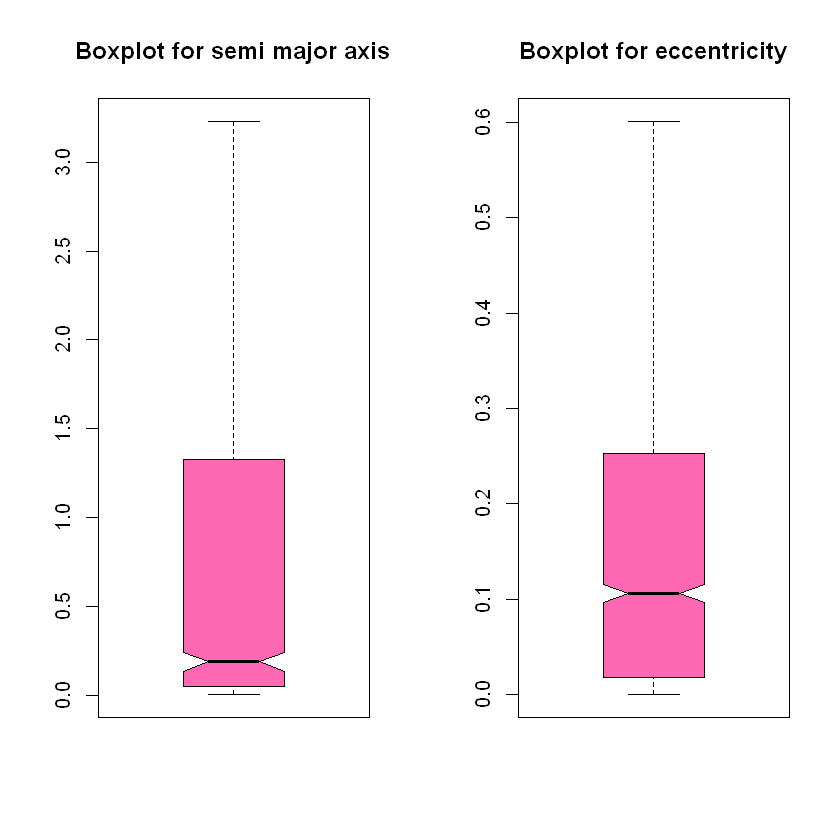

In [4]:
#boxplot to identify outliers
par(mfrow=c(1,2))
x.out<-boxplot(x,  notch=T, 
               main='Boxplot for semi major axis',outline=FALSE,col='hotpink')$out  #outline=FALSE doesn't plot outliers
y.out<-boxplot(y,  notch=T, pch=20, cex=0.5, main='Boxplot for eccentricity',outline=FALSE,col='hotpink')$out
y.out<-c(y.out)


y.clean<-y[! y %in% y.out]
x.clean<-x[! y %in% y.out]

### Mass vs. Radius for Primary transit

Call:
loess(formula = sorty ~ sortx, data = data.frame(x = x, y = y), 
    span = 0.5)

Number of Observations: 769 
Equivalent Number of Parameters: 8.02 
Residual Standard Error: 0.2878 
Trace of smoother matrix: 8.84  (exact)

Control settings:
  span     :  0.5 
  degree   :  2 
  family   :  gaussian
  surface  :  interpolate	  cell = 0.2
  normalize:  TRUE
 parametric:  FALSE
drop.square:  FALSE 

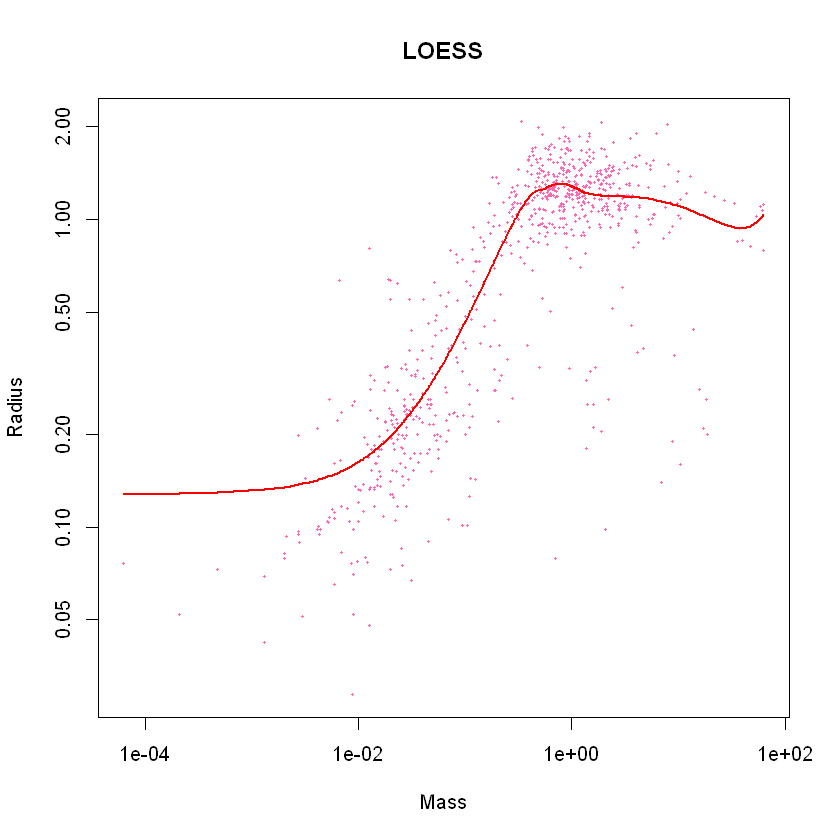

In [5]:
Prim.transit <- subset(dat, dat$detection=='Primary Transit')
Prim.transit <- Prim.transit[!is.na(Prim.transit$radius),]

Prim.transit<-Prim.transit[!is.na(Prim.transit$mass),]

x<-Prim.transit$mass
y<-Prim.transit$radius

sortx <- x[order(x)] ; sorty <- y[order(x)]
local_fit <- loess(sorty ~ sortx, span=0.5, data.frame(x=x,y=y))
summary(local_fit)
plot(x,y,pch=20, cex=0.5, main='LOESS',xlab='Mass',ylab='Radius',log='xy',col='hotpink')
lines(sortx, predict(local_fit), lwd=2, col=2)

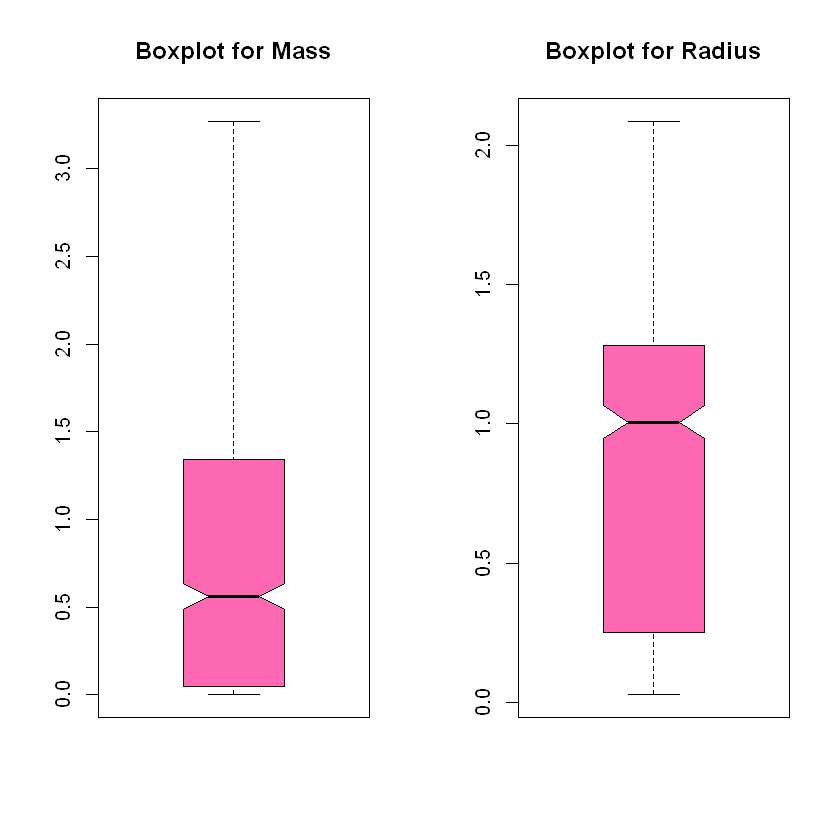

In [6]:
#boxplot for mass and radius without outliers
par(mfrow=c(1,2))
x.out<-boxplot(x,  notch=T, main='Boxplot for Mass',outline=FALSE,col='hotpink')
boxplot(y,  notch=T, pch=20, cex=0.5, main='Boxplot for Radius',outline=FALSE,col='hotpink')

### Orbital period vs. Semi major axis

Call:
loess(formula = sorty ~ sortx, data = data.frame(x = x.clean, 
    y = y.clean), span = 0.5)

Number of Observations: 1924 
Equivalent Number of Parameters: 8.48 
Residual Standard Error: 11.58 
Trace of smoother matrix: 9.34  (exact)

Control settings:
  span     :  0.5 
  degree   :  2 
  family   :  gaussian
  surface  :  interpolate	  cell = 0.2
  normalize:  TRUE
 parametric:  FALSE
drop.square:  FALSE 

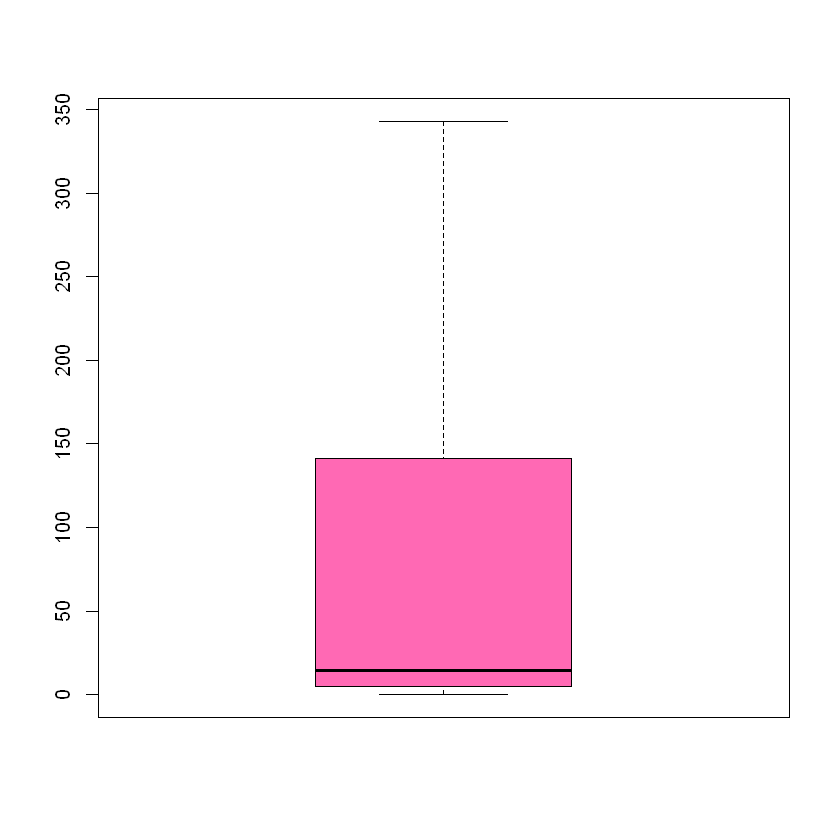

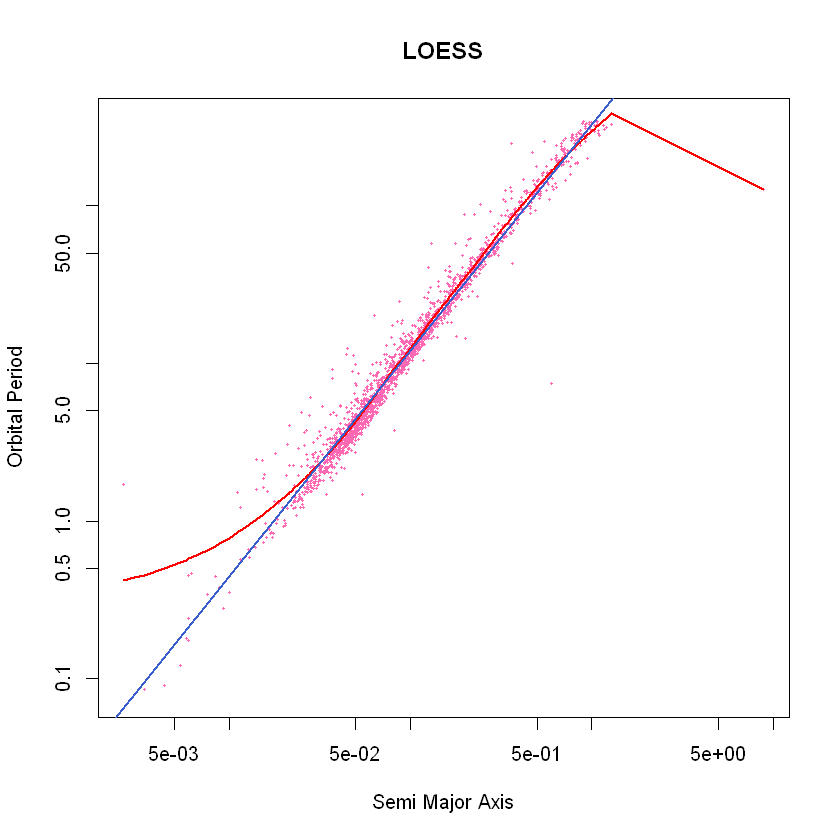

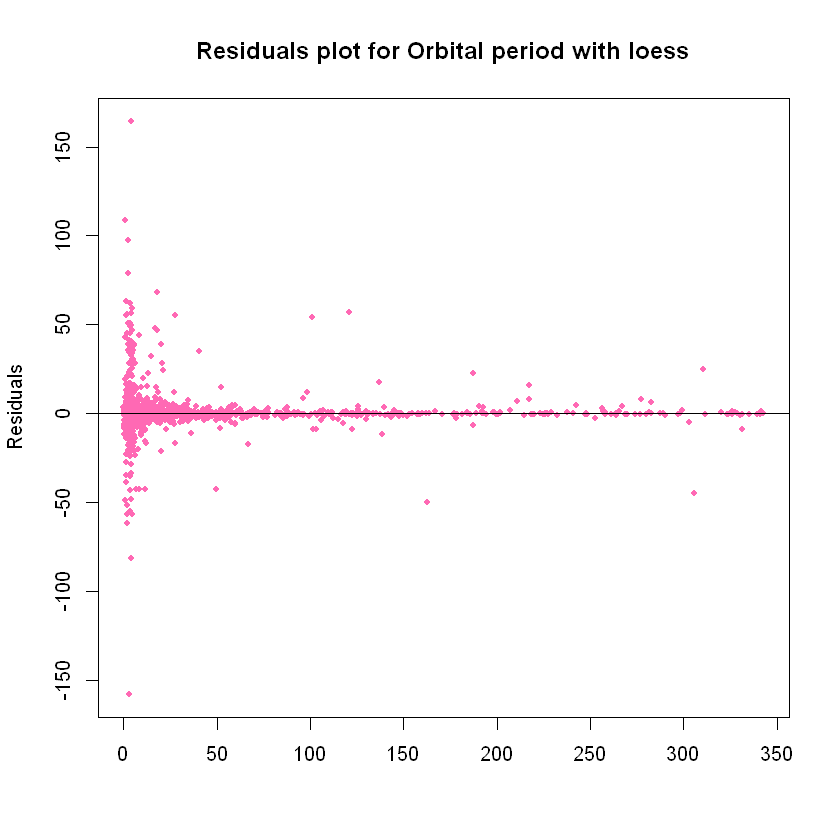

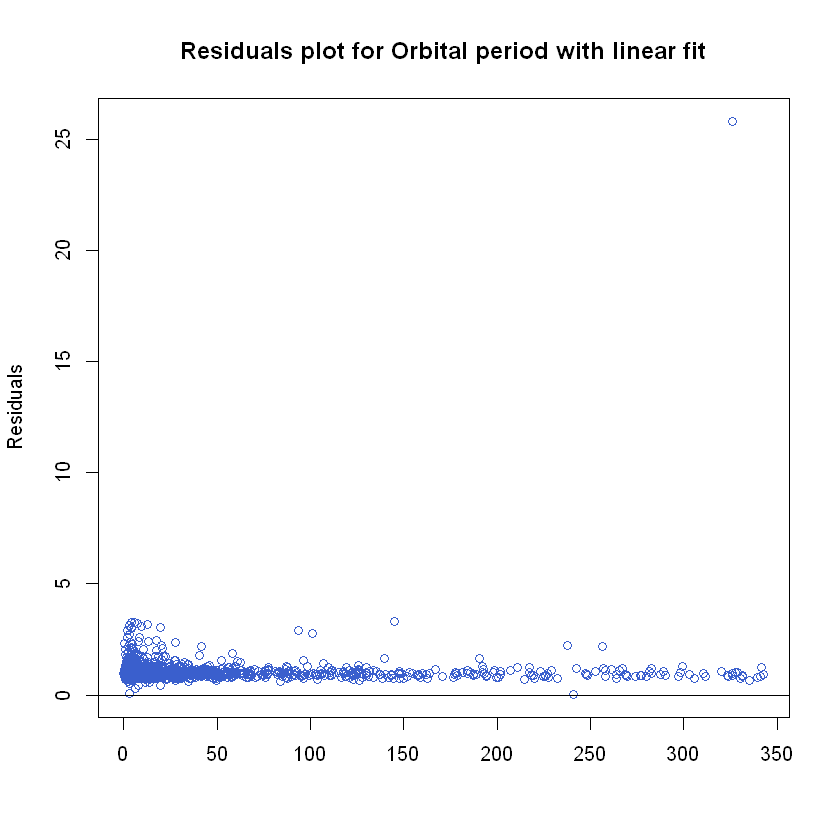

In [7]:
#remove orbital period outliers perchè non mi piacciono

df<-dat[!is.na(dat$orbital_period), ]
df<-df[!is.na(df$semi_major_axis),]

x<-df$semi_major_axis
y<-df$orbital_period

y.out <- c(boxplot(y,outline=FALSE,col='hotpink')$out)

y.clean<-y [! y %in% y.out]
x.clean<-x[! y %in% y.out]

sortx <- x.clean[order(x.clean)] ; sorty <- y.clean[order(x.clean)]
local_fit <- loess(sorty ~ sortx, span=0.5, data.frame(x=x.clean,y=y.clean))
linear_fit <- lm(log10(sorty) ~ log10(sortx))
summary(local_fit)
plot(x.clean,y.clean,pch=20, cex=0.5, main='LOESS',xlab='Semi Major Axis',ylab='Orbital Period',
     log='xy',col='hotpink')
lines(sortx, predict(local_fit), lwd=2, col=2)
abline(linear_fit, lwd=2, col='royalblue3')

# residual plot
orbital_period.res = resid(local_fit)
plot(y.clean, orbital_period.res,pch=20, ylab="Residuals", xlab="", 
     main="Residuals plot for Orbital period with loess",col='hotpink')
abline(0,0)

##################################################################CHECK THIS PART###################################
orbital_period.res = resid(linear_fit)
plot(y.clean, 10**orbital_period.res, ylab="Residuals", xlab="", 
     main="Residuals plot for Orbital period with linear fit",col='royalblue3') 
abline(0,0)

### Systems with Multiple Planets ---> CHE SCRIVIAMO? Confronto con le stelle?

In [8]:
Y<-as.integer(as.logical(duplicated(dat$star_name)))

#inspect multiple or single planets
# we added a new binary variable indicator for multiple planets

bin<-cbind(dat,Y)
multi.planet<-subset(bin,bin$Y==1)
single.planet<-subset(bin,bin$Y==0)
multi.planet <- multi.planet[c('mass', 'radius', 'orbital_period', 'semi_major_axis', 'eccentricity', 'mag_v', 'star_distance', 'star_metallicity', 'star_mass', 'star_radius', 'star_age', 'star_teff')]
single.planet <- single.planet[c('mass', 'radius', 'orbital_period', 'semi_major_axis', 'eccentricity', 'mag_v', 'star_distance', 'star_metallicity', 'star_mass', 'star_radius', 'star_age', 'star_teff')]

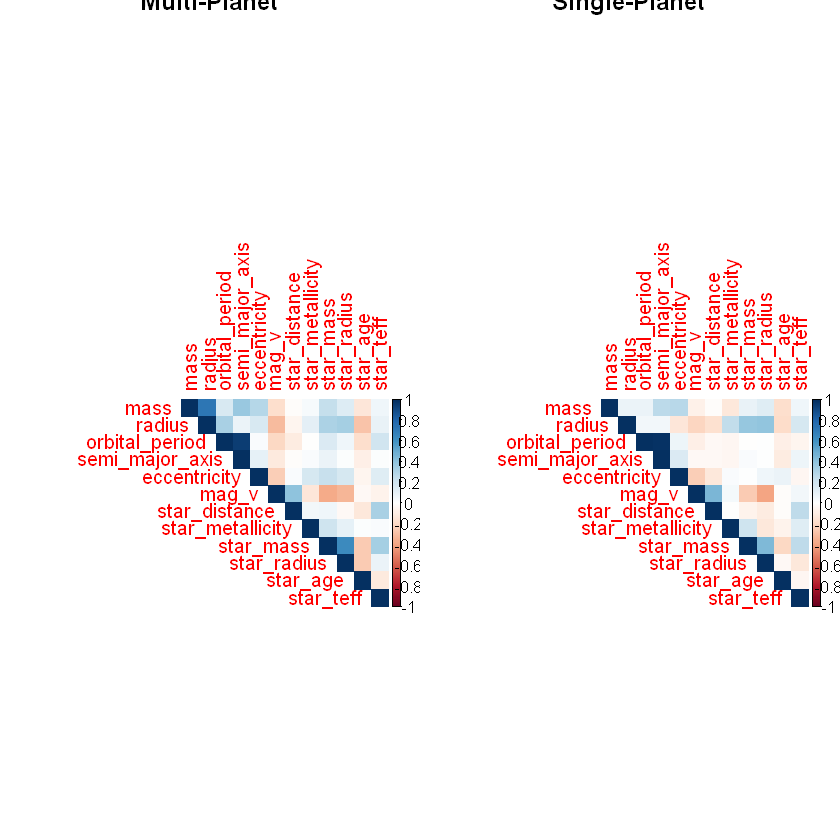

In [49]:
par(mfrow=c(1,2))
#plot of the correlation matrix
corrplot(cor(multi.planet,use='pairwise.complete.obs'), method='color', type='upper', title='Multi-Planet')
corrplot(cor(single.planet,use='pairwise.complete.obs'), method='color', type='upper', title='Single-Planet')

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"257 y values <= 0 omitted from logarithmic plot"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""log" is not a graphical parameter"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""log" is not a graphical parameter"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""log" is not a graphical parameter"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""log" is not a graphical parameter"

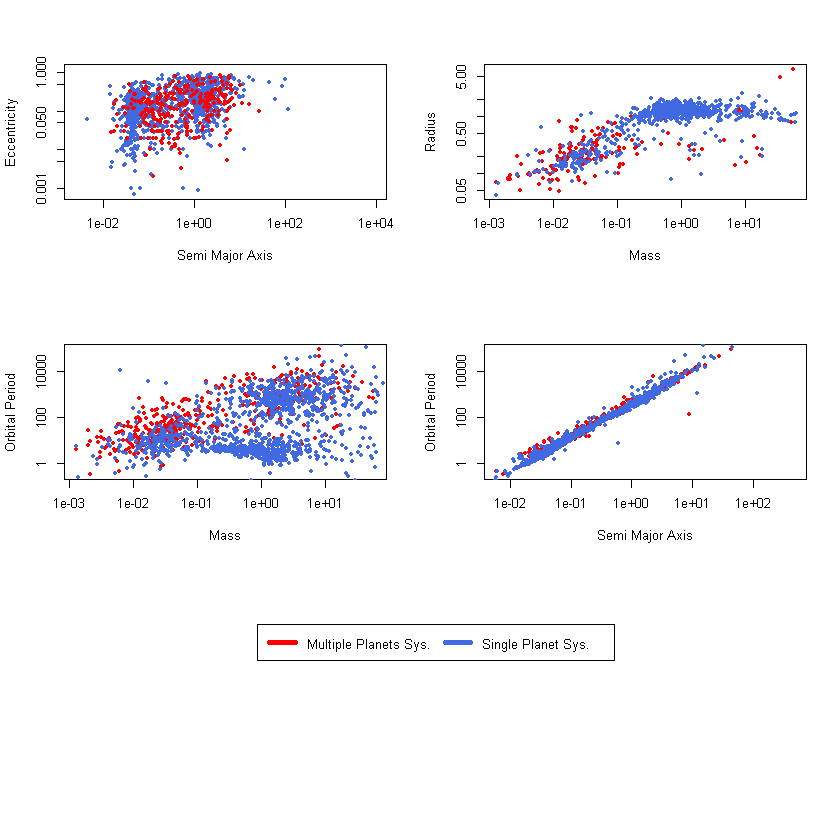

In [68]:
m <- matrix(c(1,2,3,4,5,5),nrow = 3,ncol = 2,byrow = TRUE)
layout(mat = m)

#plot(multi.planet$semi_major_axis, multi.planet$eccentricity,log='xy',col='red', xlab='Semi Major Axis', ylab='Eccentricity')
plot(single.planet$semi_major_axis, single.planet$eccentricity,pch=20,log='xy',col='royalblue', xlab='Semi Major Axis', ylab='Eccentricity')
points(multi.planet$semi_major_axis, multi.planet$eccentricity,pch=20,log='xy',col='red', xlab='Semi Major Axis', ylab='Eccentricity')


plot(multi.planet$mass, multi.planet$radius,pch=20,log="xy",col='red', xlab='Mass', ylab='Radius')
points(single.planet$mass, single.planet$radius,pch=20,log="xy",col='royalblue', xlab='Mass', ylab='Radius')

plot(multi.planet$mass, multi.planet$orbital_period,pch=20,log="xy",col='red', xlab='Mass', ylab='Orbital Period')
points(single.planet$mass, single.planet$orbital_period,pch=20,log="xy",col='royalblue', xlab='Mass', ylab='Orbital Period')

plot(multi.planet$semi_major_axis, multi.planet$orbital_period,pch=20,log="xy",col='red', xlab='Semi Major Axis', ylab='Orbital Period')
points(single.planet$semi_major_axis, single.planet$orbital_period,pch=20,log="xy",col='royalblue', xlab='Mass', ylab='Orbital Period')


# dummy plot for legend
plot(0:1,0:1, type = "n", axes=FALSE, xlab="", ylab="")
legend(x = "top",inset = 0, legend = c("Multiple Planets Sys.", "Single Planet Sys."), 
        col=c('red','royalblue'), lwd=4, horiz = TRUE)

## d,e) Preparation and Execution of Multivariate Analysis
To tackle the problem of the missing values we first scale our data (i.e. for each feature we remove the mean and divide by the deviation ) and then we set those missing values to 0

In [9]:
#keep only numerical features (cols)
numeric.columns <- sapply(df, function(x) {!is.factor(x)})
dat.n<-df[,numeric.columns]

#remove error cols
X <- dat.n %>% select(-contains("error"))

#remove col with NA
X <- X[,-21]
# drop 'discovered' feature
X['discovered'] <- NULL

In [10]:
# scale variables
X <- as.data.frame(scale(X,center=T,scale=T))
X[is.na(X)]=0
devs <- sapply(X,sd)
stdThreshold <- 0.65
X <- X[devs>stdThreshold]
#we drop ra and dec since they relate to relative position from earth
X['ra'] <- NULL
X['dec'] <- NULL

In [11]:
# function to remove outliers

replace.out <- function(x){
    #20 cycles in order to neglect all the outliers
    for (j in 1:20) {
        for (i in 1:12) {
            bplot <- boxplot(x[,i],plot=F)
            x[,i][ x[,i] %in% bplot$out ] <- median(as.matrix(x[,i]))
        }
    }
    return(x)
}

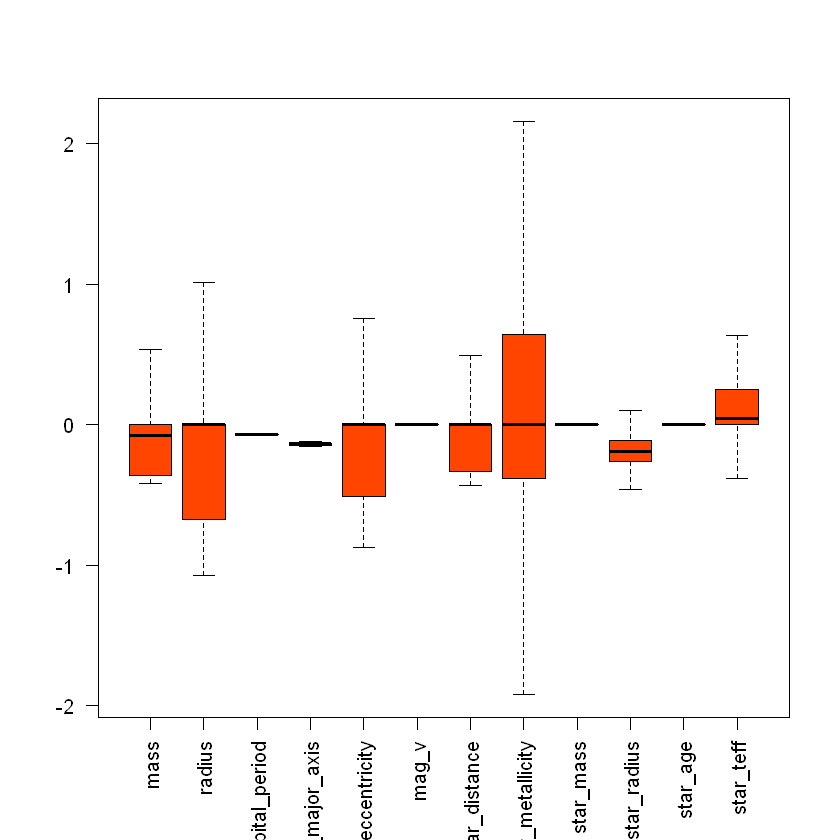

In [12]:
#remove outliers
#bplot <- boxplot(X, las=2, notch=F,outline=T, col='orangered')
X <- replace.out(X)
#X <- lapply(X, as.numeric)
bplot <- boxplot(X, las=2, notch=F,outline=T, col='orangered')

In [29]:
#test <- as.data.frame(na.approx(df_new, rule=1))
#plot(test$semi_major_axis, test$orbital_period, log='xy')

PCA Summary:Standard deviations (1, .., p=12):
 [1] 7.854696e-01 4.445108e-01 3.532505e-01 2.286320e-01 1.914065e-01
 [6] 1.641080e-01 9.780230e-02 5.790935e-03 1.252371e-04 7.606877e-19
[11] 3.913778e-22 1.337737e-39

Rotation (n x k) = (12 x 12):
                           PC1           PC2           PC3           PC4
mass             -5.289794e-02  1.819963e-01  0.0231237949  2.070635e-01
radius            2.582081e-01 -7.521181e-01  0.5598116621  1.038622e-01
orbital_period   -5.053113e-05  9.825840e-05  0.0002292063 -1.867447e-04
semi_major_axis  -7.563108e-04  1.888158e-03  0.0041249329 -1.868516e-03
eccentricity     -8.671222e-02  5.663255e-01  0.8040123745  3.277901e-02
mag_v             0.000000e+00  1.734723e-18  0.0000000000  2.220446e-16
star_distance    -3.130373e-02  7.317807e-02 -0.1614653872  3.904748e-01
star_metallicity  9.596539e-01  2.675694e-01 -0.0847028012  1.309997e-02
star_mass         0.000000e+00  0.000000e+00  0.0000000000  0.000000e+00
star_radius       2.6

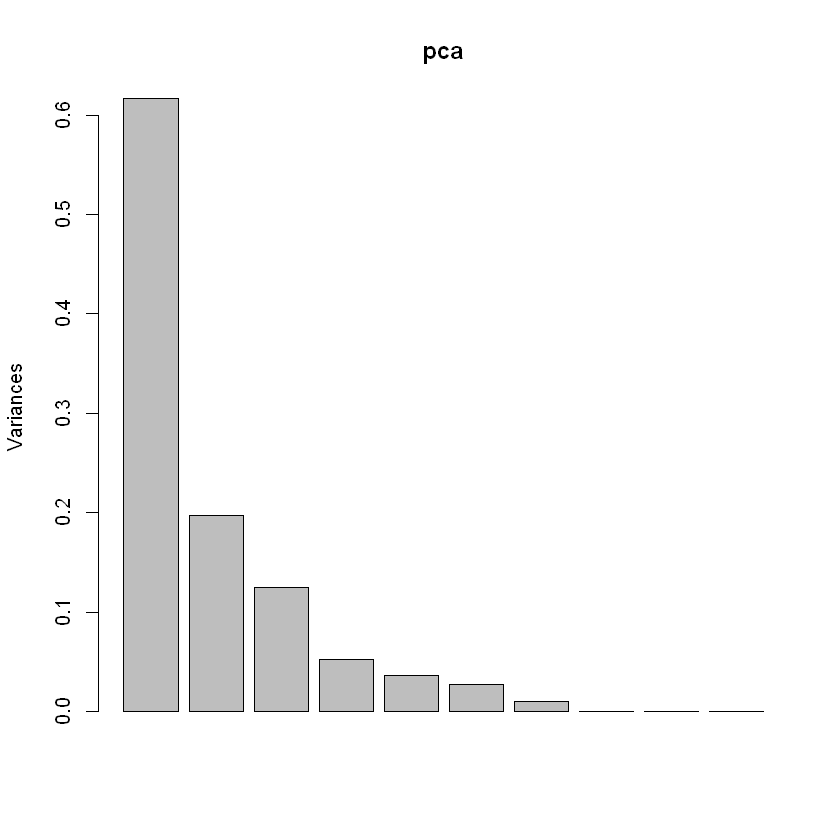

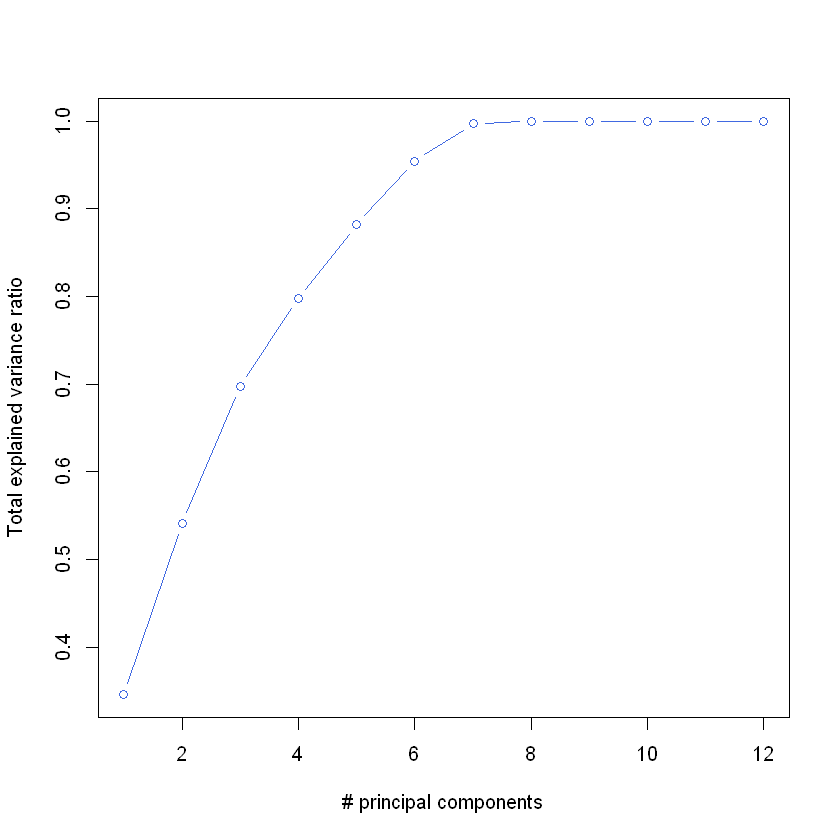

In [13]:
pca <- prcomp(x=X, retx=T)
cat('PCA Summary:')
print(pca)
X_pca <- as.data.frame(pca['x'])
sd_pca <- unlist(pca['sdev'], use.names=F)
sd_pca <- sd_pca/sum(sd_pca)
plot(pca, )
plot(cumsum(sd_pca),type='b', col='royalblue', xlab='# principal components', ylab='Total explained variance ratio')

Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"

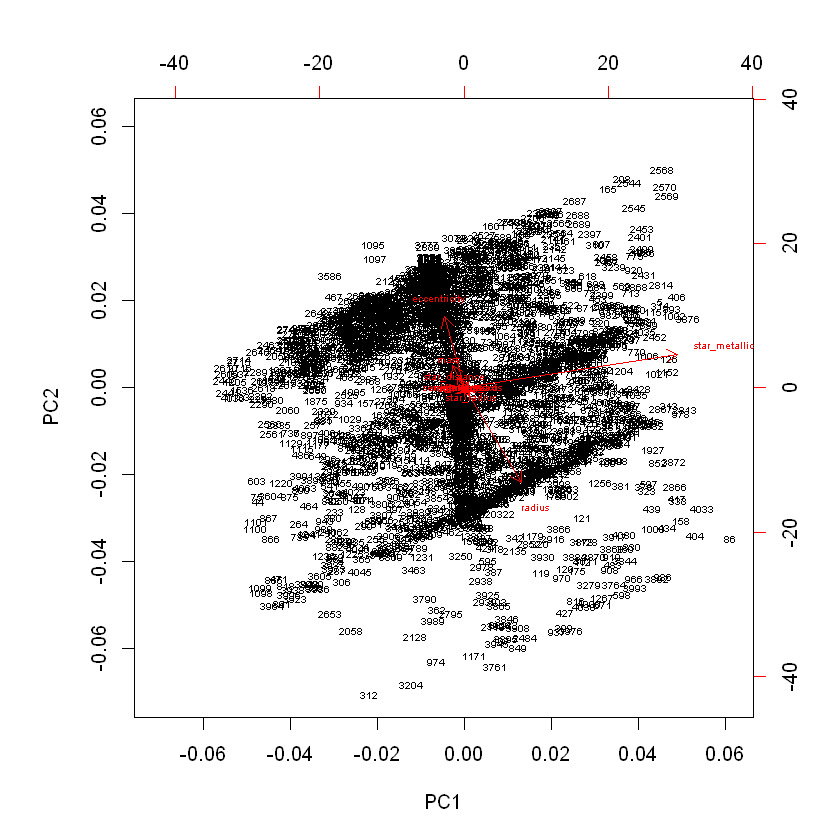

In [81]:
# we also plotted a biplot of the first two Principal Components
biplot(pca, cex = 0.5)

In [85]:
############################## LO USIAMO ???????
earth(X)

ERROR: Error in levels(y): no 'y' argument


## f) Machine Learning

### Self-organizing Map (SOM)

Loading required package: kohonen
Loading required package: RColorBrewer


SOM of size 4x4 with a rectangular topology and a bubble neighbourhood function.
The number of data layers is 1.
Distance measure(s) used: sumofsquares.
Training data included: 2408 objects.
Mean distance to the closest unit in the map: 0.225.


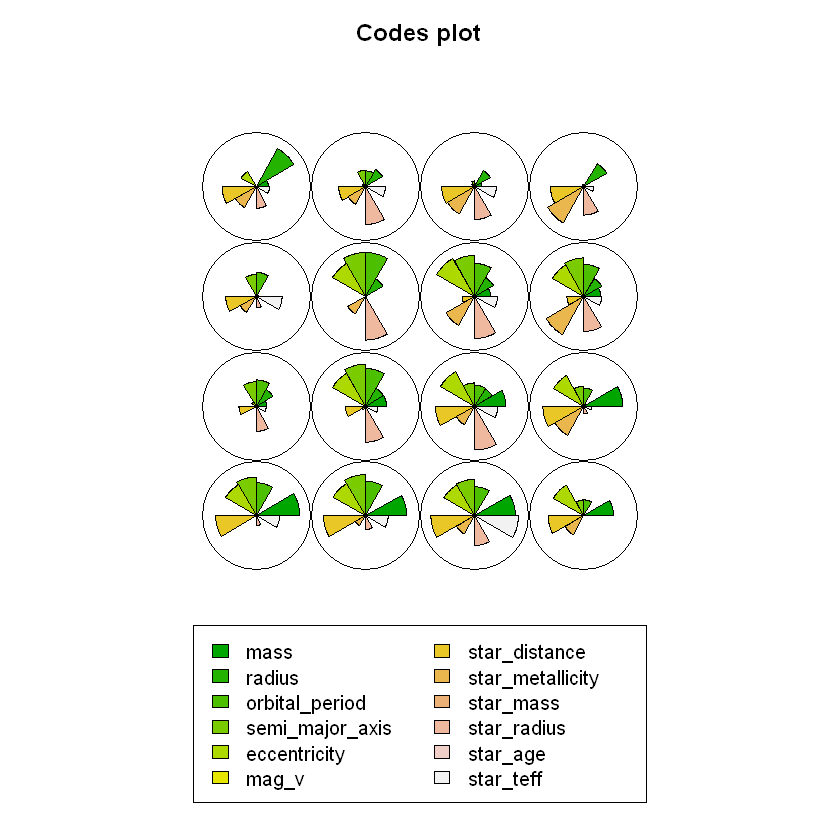

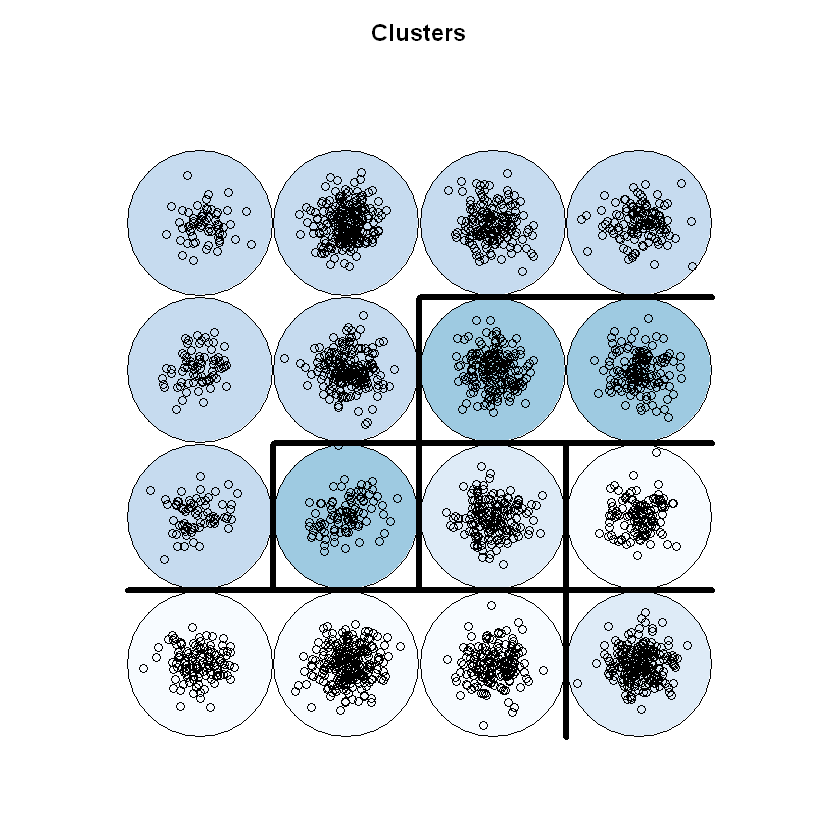

In [86]:
# Self-organizing Map (SOM)
require(kohonen)
require(RColorBrewer)

xdim = 4
ydim = 4
total_dim = xdim*ydim

som_grid <- somgrid(xdim , ydim, topo="rectangular")
som_model <- som(as.matrix(X) , grid = som_grid)

summary(som_model)
plot(som_model)

som_cluster <- cutree(hclust(dist(unlist(som_model$codes))), total_dim)
plot(som_model, type="mapping", bgcol = brewer.pal(9,"Blues")[som_cluster], main = "Clusters") 
add.cluster.boundaries(som_model, som_cluster)

### Isomap

Isomap is a nonlinear dimension reduction method which preserves global properties of the data. 

In [9]:
#convert the data frame into a matrix
X.mat <- data.matrix(X,rownames.force = NA) 
head(X.mat)

,mass,mass_sini,radius,orbital_period,semi_major_axis,eccentricity,inclination,angular_distance,omega,k,mag_v,star_distance,star_metallicity,star_mass,star_radius,star_age,star_teff
1,-0.3044580,0.0000000,0,-0.1068925,-0.2102358,0.3115863,0,-0.10031655,0,0.1399863,-1.6017538,-0.2637803,-1.66387222,3.8378587,3.0641847,0.0000000,-0.43505343
3,-0.3044580,0.0000000,0,-0.1068925,-0.2102358,-0.4647923,0,-0.09838359,0,0.0000000,-1.5114253,-0.2403216,0.02876894,1.7226176,4.0149336,-1.0475018,-0.70630711
4,-0.3044580,0.2217209,0,-0.1068925,-0.2102358,-0.8761186,0,-0.10158096,0,0.0000000,-1.4469049,-0.3539247,-1.18646061,2.6627248,1.5669423,0.0000000,-0.38714544
5,-0.3044580,0.1305092,0,-0.1068925,-0.2102358,1.0211242,0,0.12312792,0,0.0000000,-0.9791322,-0.5075920,1.72141011,-0.3926235,-0.3592600,0.1360063,-0.05111476
6,-0.2417716,-0.2607758,0,-0.1068925,-0.2102358,-0.3311112,0,0.00526778,0,0.0000000,-1.1307551,-0.4988675,0.20237316,-0.1340940,-0.3083538,1.1055467,0.25590123
7,-0.3044580,0.0000000,0,-0.1068925,-0.2102358,-0.4647923,0,-0.06253606,0,0.0000000,-1.3501244,-0.3626228,-0.37052077,2.8977515,1.0990540,0.0000000,-0.27513521


In [ ]:
#apply isomap with different dimensions, package: RDRToolbox
Isomap.out <- Isomap(data=X.mat, dims=1:12, k=10, plotResiduals=TRUE)

Computing distance matrix ... Warning message in sqrt(d):
"NaNs produced"done
Building graph with shortest paths (using 10 nearest neighbours) ... 

In [ ]:
#plot 3dim
scatterplot3d(Isomap.out$dim3)

In [ ]:
#plot 2 dim
plot(Isomap.out$dim2)

### Local Linear Embedding

In [10]:
# package: RDRToolbox
#dim=3
LLE.out3d <- LLE(data=X.mat, dim=3, k=10)
plotDR(data=LLE.out3d)

Computing distance matrix ... done
Computing low dimensional emmbedding (using 10 nearest neighbours)... 

ERROR: Error in solve.default(Cov, rep(1, k)): system is computationally singular: reciprocal condition number = 1.96367e-17


In [38]:
#plot 3dim
scatterplot3d(LLE.out3d)

Computing distance matrix ... Warning message in sqrt(d):
“Si è prodotto un NaN”done
Computing low dimensional emmbedding (using 10 nearest neighbours)... 

ERROR: Error in solve.default(Cov, rep(1, k)): il sistema è numericamente singolare: valore di condizione di reciprocità = 1.23963e-17


In [ ]:
#dim=2
LLE.out2d <- LLE(data=X.mat, dim=2, k=3)
#plot 2dim
plot(LLE.out2d)

### Diffusion Maps

Performing eigendecomposition
Computing Diffusion Coordinates
Used default value: 17 dimensions
Elapsed time: 23.33 seconds
$eigenmult
 [1] 1.99929032 0.84493145 0.76127093 0.48995666 0.34578340 0.30345212
 [7] 0.27522445 0.23175282 0.18717532 0.16189283 0.15574057 0.14171474
[13] 0.13271710 0.10943645 0.10554685 0.10296962 0.09489562

$epsilon
[1] 0.7



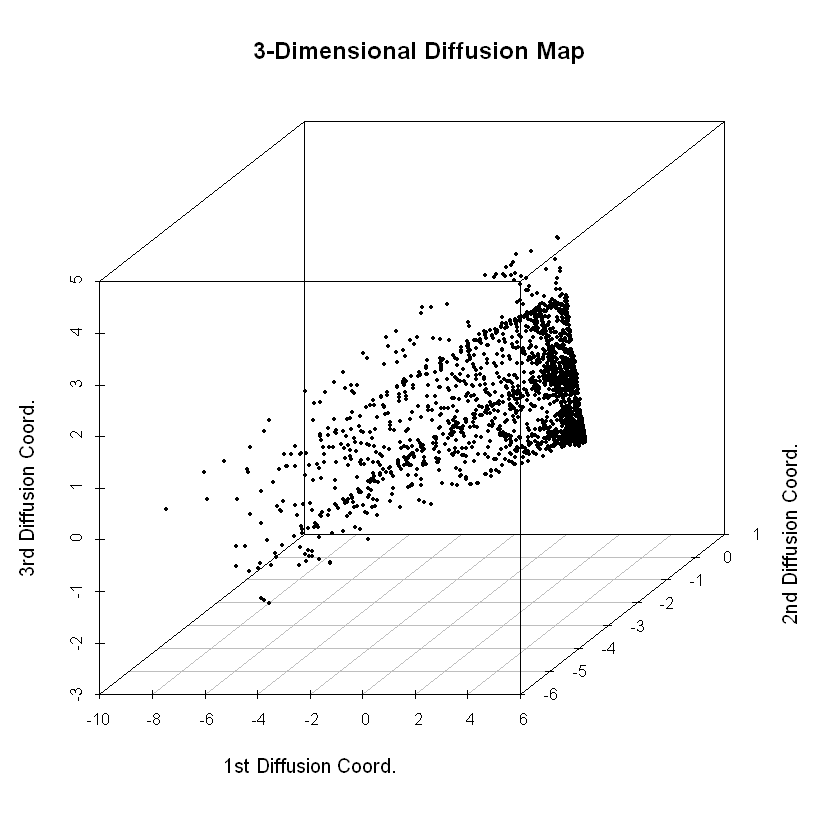

In [14]:
#distance matrix
D <- as.matrix(dist(X))

dmap.out <- diffuse(D, eps.val=0.7)
print(dmap.out)
plot(dmap.out)

### TSne

In [15]:
tsne.out <- Rtsne(X, dims=3, perplexity=100, check_duplicates=F )

In [ ]:
scatterplot3d(tsne.out$Y[,1],tsne.out$Y[,2],tsne.out$Y[,3])

In [ ]:
par(mfrow=c(2,2))
plot(tsne.out$Y[,1],tsne.out$Y[,2])
plot(tsne.out$Y[,1],tsne.out$Y[,3])
plot(tsne.out$Y[,2],tsne.out$Y[,3])

### Autoencoder

In [ ]:
library(ANN2)

In [109]:
newDim <- 2 # bottleneck layer
train_ind <- sample(dim(X.mat)[1])
X_train <- X.mat[train_ind,]
X_test <- X.mat[-train_ind,]

In [113]:
aeNN <- autoencoder(X=X_train, hidden.layers=c(newDim), random.seed=1204565)

Artificial Neural Network: 
  Layer - 12 nodes - input 
  Layer - 2 nodes - tanh 
  Layer - 12 nodes - linear 
With squared loss and SGD optimizer 
Training progress:
[++++++++++++++++++++++++++++++++++++++++++++++++++] 100% - Validation loss: 4.94005


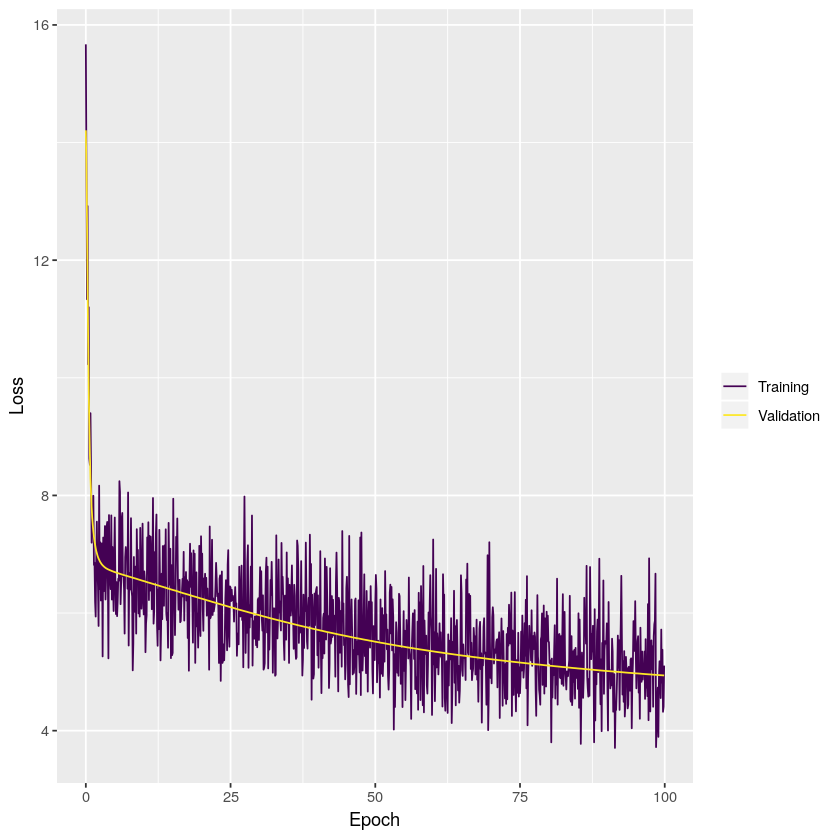

In [114]:
plot(aeNN)

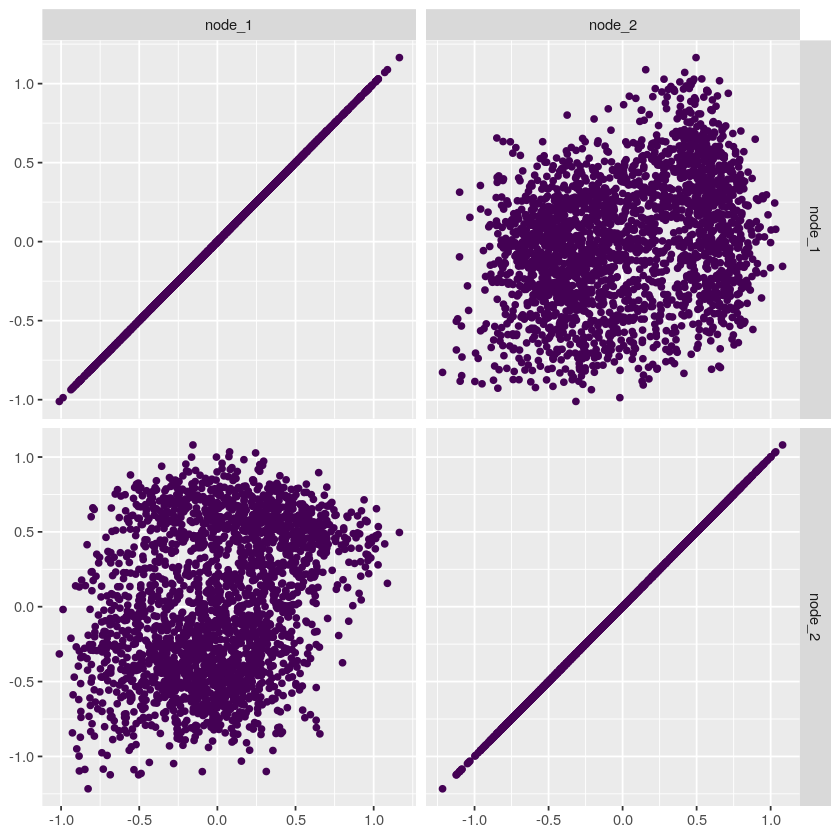

In [115]:
compression_plot(aeNN, X.mat)

In [116]:
rec_train <- reconstruct(aeNN, X_train)
rec_test <- reconstruct(aeNN, X_test)